In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

The formula commonly used to calculate brightness from RGB values is:
- Brightness=0.299×R+0.587×G+0.114×B

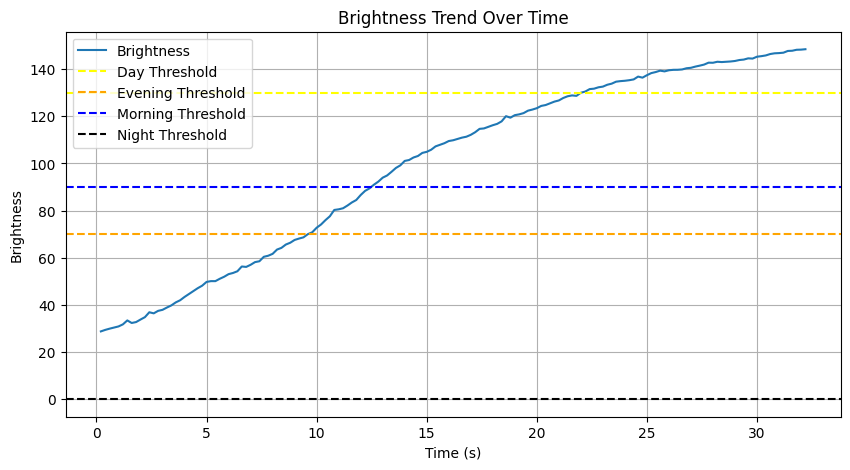

Classification Summary:
Early Morning: 0 frames (0.00%)
Day: 52 frames (32.30%)
Evening: 62 frames (38.51%)
Night: 47 frames (29.19%)


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_brightness(frame):
    """
    Calculate the average brightness of an image (frame) using weighted RGB channels.
    """
    (B, G, R) = cv2.split(frame)
    brightness = 0.299 * R + 0.587 * G + 0.114 * B
    return np.mean(brightness)

def classify_time_of_day(brightness, day_threshold=130, evening_threshold=70, night_threshold=0, morning_threshold=90):
    """
    Classify the time of day based on brightness value using thresholds.
    """
    if brightness > day_threshold:
        return 'Day'
    elif brightness > evening_threshold:
        return 'Evening'
    elif brightness > morning_threshold:
        return 'Early Morning'
    else:
        return 'Night'

def classify_video(video_path, output_path, day_threshold, evening_threshold, night_threshold, morning_threshold, frame_step=5):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, fourcc, fps // frame_step, (width, height))
    
    brightness_values = []
    classifications = []
    frame_indices = []
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1
        if frame_count % frame_step != 0:
            continue
        
        brightness = calculate_brightness(frame)
        brightness_values.append(brightness)
        frame_indices.append(frame_count / fps)
        
        time_of_day = classify_time_of_day(brightness, day_threshold, evening_threshold, night_threshold, morning_threshold)
        classifications.append(time_of_day)
        
        cv2.rectangle(frame, (30, 30), (300, 80), (0, 0, 0), -1)  # Translucent background
        cv2.putText(frame, f"{time_of_day} (Brightness: {brightness:.2f})", (40, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        out.write(frame)
    
    cap.release()
    out.release()
    
    if brightness_values:
        # Plot the brightness trend over time
        plt.figure(figsize=(10, 5))
        plt.plot(frame_indices, brightness_values, label="Brightness")
        plt.axhline(y=day_threshold, color='yellow', linestyle='--', label='Day Threshold')
        plt.axhline(y=evening_threshold, color='orange', linestyle='--', label='Evening Threshold')
        plt.axhline(y=morning_threshold, color='blue', linestyle='--', label='Morning Threshold')
        plt.axhline(y=night_threshold, color='black', linestyle='--', label='Night Threshold')
        plt.xlabel("Time (s)")
        plt.ylabel("Brightness")
        plt.title("Brightness Trend Over Time")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Classification counts
        total_frames = len(classifications)
        morning_count = classifications.count('Early Morning')
        day_count = classifications.count('Day')
        evening_count = classifications.count('Evening')
        night_count = classifications.count('Night')
        
        # Calculate percentages
        morning_percentage = (morning_count / total_frames) * 100
        day_percentage = (day_count / total_frames) * 100
        evening_percentage = (evening_count / total_frames) * 100
        night_percentage = (night_count / total_frames) * 100
        
        # Print summary with percentages
        print(f"Classification Summary:")
        print(f"Early Morning: {morning_count} frames ({morning_percentage:.2f}%)")
        print(f"Day: {day_count} frames ({day_percentage:.2f}%)")
        print(f"Evening: {evening_count} frames ({evening_percentage:.2f}%)")
        print(f"Night: {night_count} frames ({night_percentage:.2f}%)")
    else:
        print("No frames processed.")

# Run the updated video classification
video_path = './Data/assignment_1.mp4'
output_path = './Data/assignment_video_advanced.mp4'
classify_video(video_path, output_path, day_threshold=130, evening_threshold=70, night_threshold=0, morning_threshold=90, frame_step=5)